Tabel Data:
     NIM Hasil Sebenarnya Hasil Prediksi
0  TI001            Lulus          Lulus
1  TI002            Lulus          Lulus
2  TI003            Lulus          Lulus
3  TI004            Lulus    Tidak Lulus
4  TI005            Lulus    Tidak Lulus
5  TI006      Tidak Lulus          Lulus
6  TI007      Tidak Lulus    Tidak Lulus
7  TI008      Tidak Lulus    Tidak Lulus
8  TI009      Tidak Lulus    Tidak Lulus
9  TI010      Tidak Lulus    Tidak Lulus

--- Confusion Matrix ---
[[4 1]
 [2 3]]
Baris 0 = Sebenarnya Tidak Lulus; Baris 1 = Sebenarnya Lulus
Kolom 0 = Prediksi Tidak Lulus; Kolom 1 = Prediksi Lulus


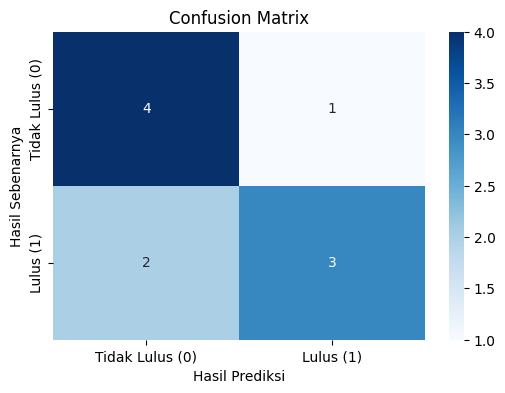


--- Hasil Perhitungan Metrik (Persentase) ---
1. Accuracy: 0.7000 (70.00%)
   (Skor Benar/Total: 7/10)
2. Precision: 0.7500 (75.00%)
   (Dari semua prediksi 'Lulus', yang benar-benar Lulus: 3/4)
3. Recall: 0.6000 (60.00%)
   (Dari semua yang benar-benar 'Lulus', yang berhasil diprediksi: 3/5)


In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Persiapan Data

# Data dari tabel (Nilai sebenarnya dan Nilai Prediksi)
nim = ['TI001', 'TI002', 'TI003', 'TI004', 'TI005', 'TI006', 'TI007', 'TI008', 'TI009', 'TI010']
hasil_sebenarnya = ['Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus']
hasil_prediksi = ['Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus']

# Membuat DataFrame untuk memudahkan visualisasi data
data = pd.DataFrame({
    'NIM': nim,
    'Hasil Sebenarnya': hasil_sebenarnya,
    'Hasil Prediksi': hasil_prediksi
})

print("Tabel Data:")
print(data)

# 2. Pembuatan Confusion Matrix

# Mengubah label string menjadi numerik untuk perhitungan metrik
# 'Lulus' = 1 (Positif), 'Tidak Lulus' = 0 (Negatif)
# Ini adalah pemetaan penting dalam klasifikasi biner.
y_true = [1 if x == 'Lulus' else 0 for x in hasil_sebenarnya]
y_pred = [1 if x == 'Lulus' else 0 for x in hasil_prediksi]

# Menghitung Confusion Matrix
# Label: 0 (Tidak Lulus), 1 (Lulus)
cm = confusion_matrix(y_true, y_pred)

print("\n--- Confusion Matrix ---")
print(cm)
print("Baris 0 = Sebenarnya Tidak Lulus; Baris 1 = Sebenarnya Lulus")
print("Kolom 0 = Prediksi Tidak Lulus; Kolom 1 = Prediksi Lulus")

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Lulus (0)', 'Lulus (1)'],
            yticklabels=['Tidak Lulus (0)', 'Lulus (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Hasil Prediksi')
plt.ylabel('Hasil Sebenarnya')
plt.show()

# Berdasarkan CM:
# TN (True Negative): cm[0, 0] = 4 (Benar prediksi Tidak Lulus)
# FP (False Positive): cm[0, 1] = 1 (Salah prediksi Lulus, seharusnya Tidak Lulus)
# FN (False Negative): cm[1, 0] = 2 (Salah prediksi Tidak Lulus, seharusnya Lulus)
# TP (True Positive): cm[1, 1] = 3 (Benar prediksi Lulus)

# 3. Perhitungan Metrik (Langkah 2 dari soal)

# Total data
N = len(y_true)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# 3.1. Accuracy
# Accuracy = (TP + TN) / N
accuracy_manual = (TP + TN) / N
accuracy_sklearn = accuracy_score(y_true, y_pred)

# 3.2. Precision
# Precision = TP / (TP + FP)
precision_manual = TP / (TP + FP)
precision_sklearn = precision_score(y_true, y_pred)

# 3.3. Recall
# Recall = TP / (TP + FN)
recall_manual = TP / (TP + FN)
recall_sklearn = recall_score(y_true, y_pred)

print("\n--- Hasil Perhitungan Metrik (Persentase) ---")

print(f"1. Accuracy: {accuracy_manual:.4f} ({accuracy_manual*100:.2f}%)")
print(f"   (Skor Benar/Total: {TP + TN}/{N})")

print(f"2. Precision: {precision_manual:.4f} ({precision_manual*100:.2f}%)")
print(f"   (Dari semua prediksi 'Lulus', yang benar-benar Lulus: {TP}/{TP + FP})")

print(f"3. Recall: {recall_manual:.4f} ({recall_manual*100:.2f}%)")
print(f"   (Dari semua yang benar-benar 'Lulus', yang berhasil diprediksi: {TP}/{TP + FN})")

# Perbandingan dengan sklearn untuk verifikasi
# print("\nVerifikasi Sklearn:")
# print(f"Accuracy (Sklearn): {accuracy_sklearn:.4f}")
# print(f"Precision (Sklearn): {precision_sklearn:.4f}")
# print(f"Recall (Sklearn): {recall_sklearn:.4f}")